# 0. PCA UK YIELD CURVE:  A "2 FACTOR" MODEL OF ALL SPOT RATES

This notebook is base on by Nathan Thomas's notebook published in:
https://towardsdatascience.com/applying-pca-to-the-yield-curve-4d2023e555b3
which we have commented and extended.

We are going to show how to apply PCA to the yield curve of the UK.
We will show that the first and second principal component transforms 
(what we have been calling the tranformed "Z1" and "Z2" features of  4.PCAInMoreDepth.pptx slides 25 to 32)
are "latent" or hidden feature (as per slide 37) that
drive the behavior of the spot rates as a whole and that
correspond closely to the 10 Year Spot Rate and the UK Inflation Rate.

# 1. Import and clean data

First we import the spot rates at different maturities from 6 months to 10 years (20 rates=features in columns).

In [1]:
!pip install openpyxl
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Import Bank of England spot curve data from excel
df = pd.read_excel("GLC Nominal month end data_1970 to 2015.xlsx", 
                   index_col=0, header=3, sheet_name="4. spot curve", skiprows=[4])

# Select all of the data up to 10 years
df = df.iloc[:,0:20]

df.head(20)

You should consider upgrading via the 'C:\Users\loren\anaconda3\envs\py37\python.exe -m pip install --upgrade pip' command.


,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10
years:,,,,,,,,,,,,,,,,,,,,
1970-01-31,NaN,8.635354,8.707430,8.700727,8.664049,8.618702,8.572477,8.528372,8.487617,8.450611,8.417442,8.388098,8.362503,8.340549,8.322116,8.307105,8.295429,8.287013,8.281788,8.279691
1970-02-28,NaN,8.413131,8.397269,8.370748,8.337633,8.301590,8.265403,8.230804,8.198713,8.169617,8.143742,8.121153,8.101810,8.085616,8.072457,8.062236,8.054864,8.050261,8.048354,8.049074
1970-03-31,NaN,7.744187,7.782761,7.795017,7.793104,7.784963,7.775288,7.766459,7.759564,7.755068,7.753158,7.753877,7.757181,7.762973,7.771153,7.781635,7.794347,7.809221,7.826197,7.845220
1970-04-30,NaN,7.606512,7.864352,7.973522,8.002442,7.992813,7.967524,7.938335,7.911422,7.890054,7.875751,7.868985,7.869583,7.877024,7.890789,7.910452,7.935656,7.966093,8.001490,8.041602
1970-05-31,NaN,7.391107,7.735838,7.862182,7.877510,7.840673,7.782249,7.718053,7.656856,7.603548,7.560502,7.528577,7.507706,7.497355,7.496983,7.506125,7.524371,7.551351,7.586723,7.630168
1970-06-30,NaN,7.364979,7.507748,7.493617,7.426751,7.346171,7.268323,7.200619,7.146402,7.106908,7.082163,7.071485,7.073761,7.087776,7.112533,7.147231,7.191214,7.243924,7.304879,7.373654
1970-07-31,6.851663,7.192984,7.172977,7.106046,7.052308,7.017426,6.999836,6.997178,7.006922,7.026981,7.055778,7.092045,7.134708,7.182897,7.235951,7.293369,7.354758,7.419808,7.488263,7.559915
1970-08-31,6.876631,7.009475,7.056214,7.063535,7.059783,7.056839,7.059390,7.069081,7.086282,7.110972,7.142876,7.181523,7.226329,7.276754,7.332371,7.392836,7.457867,7.527223,7.600697,7.678102
1970-09-30,6.946397,7.028594,7.028011,7.018305,7.010835,7.009391,7.015409,7.028982,7.049692,7.077051,7.110540,7.149612,7.193718,7.242392,7.295273,7.352073,7.412557,7.476526,7.543809,7.614256


In [2]:
# Drop nan values
df = df.dropna(how="any")

In [3]:
df.head()

,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10
years:,,,,,,,,,,,,,,,,,,,,
1970-07-31,6.851663,7.192984,7.172977,7.106046,7.052308,7.017426,6.999836,6.997178,7.006922,7.026981,7.055778,7.092045,7.134708,7.182897,7.235951,7.293369,7.354758,7.419808,7.488263,7.559915
1970-08-31,6.876631,7.009475,7.056214,7.063535,7.059783,7.056839,7.059390,7.069081,7.086282,7.110972,7.142876,7.181523,7.226329,7.276754,7.332371,7.392836,7.457867,7.527223,7.600697,7.678102
1970-09-30,6.946397,7.028594,7.028011,7.018305,7.010835,7.009391,7.015409,7.028982,7.049692,7.077051,7.110540,7.149612,7.193718,7.242392,7.295273,7.352073,7.412557,7.476526,7.543809,7.614256
1970-10-31,7.093031,7.307172,7.378760,7.364677,7.324739,7.284578,7.253662,7.234917,7.228765,7.234892,7.252477,7.280377,7.317332,7.362291,7.414444,7.473152,7.537896,7.608244,7.683826,7.764320
1971-01-31,6.931904,6.928976,6.968589,7.035600,7.117854,7.207366,7.299816,7.392529,7.484111,7.574034,7.662224,7.748862,7.834202,7.918446,8.001752,8.084251,8.166048,8.247238,8.327899,8.408105


In [4]:
df.to_csv("UK_rates_data.csv")

We examine the correlation of the 20 rates. 
As you can see, the correlation among the rates is very high, 
signifying that there may be one or two major underlying features driving the entire system of rates over time.

In [5]:
df.corr()

,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10
0.5,1.000000,0.996353,0.990350,0.983910,0.977682,0.971862,0.966466,0.961427,0.956650,0.952043,0.947527,0.943049,0.938575,0.934084,0.929562,0.924997,0.920383,0.915711,0.910975,0.906165
1,0.996353,1.000000,0.998194,0.994379,0.989912,0.985356,0.980922,0.976652,0.972514,0.968452,0.964413,0.960360,0.956267,0.952121,0.947914,0.943641,0.939297,0.934878,0.930379,0.925794
1.5,0.990350,0.998194,1.000000,0.998887,0.996420,0.993383,0.990135,0.986815,0.983459,0.980058,0.976593,0.973046,0.969412,0.965687,0.961872,0.957969,0.953980,0.949903,0.945738,0.941479
2,0.983910,0.994379,0.998887,1.000000,0.999283,0.997628,0.995485,0.993066,0.990460,0.987696,0.984783,0.981728,0.978536,0.975219,0.971784,0.968242,0.964598,0.960856,0.957016,0.953076
2.5,0.977682,0.989912,0.996420,0.999283,1.000000,0.999511,0.998327,0.996708,0.994779,0.992600,0.990200,0.987603,0.984829,0.981896,0.978821,0.975618,0.972299,0.968870,0.965333,0.961689
3,0.971862,0.985356,0.993383,0.997628,0.999511,1.000000,0.999642,0.998729,0.997412,0.995770,0.993851,0.991689,0.989313,0.986748,0.984018,0.981141,0.978132,0.974999,0.971748,0.968381
3.5,0.966466,0.980922,0.990135,0.995485,0.998327,0.999642,1.000000,0.999716,0.998959,0.997820,0.996358,0.994614,0.992624,0.990419,0.988025,0.985466,0.982757,0.979910,0.976933,0.973829
4,0.961427,0.976652,0.986815,0.993066,0.996708,0.998729,0.999716,1.000000,0.999759,0.999095,0.998071,0.996734,0.995123,0.993272,0.991211,0.988964,0.986551,0.983986,0.981276,0.978426
4.5,0.956650,0.972514,0.983459,0.990460,0.994779,0.997412,0.998959,0.999759,1.000000,0.999786,0.999184,0.998243,0.997005,0.995504,0.993773,0.991838,0.989719,0.987431,0.984984,0.982385
5,0.952043,0.968452,0.980058,0.987696,0.992600,0.995770,0.997820,0.999095,0.999786,1.000000,0.999805,0.999250,0.998377,0.997222,0.995818,0.994192,0.992365,0.990354,0.988169,0.985819


We will now standardize the 20 rates by subtracting the mean and dividing by the standard deviation.
This standardization prevents a situation where 
a given rate winds up as a protagonist of our PCA analysis simply 
because the series happens to be have markedly higher levels than the other series with which it is compared.

In [6]:
# Standardise the data in the df into z scores
df_std = ((df-df.mean()) / df.std())
df_std.head()

,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10
years:,,,,,,,,,,,,,,,,,,,,
1970-07-31,0.046342,0.137478,0.114726,0.075453,0.040053,0.011046,-0.011945,-0.029681,-0.042951,-0.052381,-0.058423,-0.061422,-0.061661,-0.059374,-0.054744,-0.047923,-0.039040,-0.028211,-0.015542,-0.001131
1970-08-31,0.052648,0.089836,0.084056,0.064191,0.042049,0.021638,0.004160,-0.010129,-0.021270,-0.029342,-0.034449,-0.036721,-0.036306,-0.033345,-0.027955,-0.020241,-0.010302,0.001768,0.015877,0.031936
1970-09-30,0.070268,0.094800,0.076648,0.052209,0.028983,0.008886,-0.007734,-0.021033,-0.031266,-0.038647,-0.043350,-0.045530,-0.045331,-0.042874,-0.038262,-0.031586,-0.022931,-0.012381,-0.000020,0.014073
1970-10-31,0.107300,0.167124,0.168778,0.143970,0.112772,0.082847,0.056698,0.034964,0.017657,0.004651,-0.004281,-0.009432,-0.011122,-0.009623,-0.005151,0.002111,0.012003,0.024380,0.039108,0.056058
1971-01-31,0.066607,0.068937,0.061040,0.056791,0.057549,0.062095,0.069180,0.077821,0.087419,0.097681,0.108503,0.119895,0.131914,0.144612,0.158027,0.172179,0.187077,0.202720,0.219093,0.236177


We will now apply the np.cov (covariance) function to the 20 standardized rates
to calculate the covariance matrix but 
since the 20 rates are standardized
the calculation of the covariance matrix yields the correlation matrix.
To perform PCA: 
We will use the correlation matrix as input to the function np.linalg.eig.
We could instead skip the calculation of the covariance/correlation matrix
and apply sklearn.decomposition.PCA to the standardized rates (df_std) directly.
Both approaches give the same result.

In [7]:
# Create a covariance matrix 

corr_matrix_array = np.array(np.cov(df_std, rowvar=False))

## 2. Compute the eigenvalues & eigenvectors of the correlation matrix

In [8]:
# Perform eigendecomposition

eigenvalues, eigenvectors = np.linalg.eig(corr_matrix_array)

# Put data into a DataFrame and save to excel
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,21))

df_eigval.to_excel("df_eigval.xlsx")
eigenvalues

array([1.96608424e+01, 3.09852494e-01, 2.48898530e-02, 3.49701416e-03,
       8.05608882e-04, 1.02750935e-04, 8.59903764e-06, 1.20913460e-06,
       9.34863269e-08, 1.48779987e-08, 2.83478462e-09, 5.90106702e-10,
       1.35020329e-10, 3.38838838e-11, 7.75850348e-12, 2.55884842e-12,
       1.11764922e-12, 2.91233034e-13, 1.05279827e-14, 6.61563059e-14])

In [9]:
# Save output to Excel
df_eigvec = pd.DataFrame(eigenvectors, index=range(1,21))

df_eigvec.to_excel("df_eigvec.xlsx")
eigenvectors[0]

array([ 2.16371103e-01, -4.76741954e-01,  5.68236802e-01,  5.42866299e-01,
       -2.57846450e-01,  1.96657936e-01,  5.29604754e-02, -1.76042849e-02,
        5.40657795e-03,  7.83010285e-04,  2.63640768e-04, -4.66590280e-05,
       -1.32071094e-05,  6.50370708e-06,  7.09869221e-07,  2.46139485e-06,
        3.84040612e-06, -1.44244079e-06, -1.56834334e-07,  3.40548877e-07])

We will now calculate the proportion of variance explained by each eigenvector 
using as input the eigenvalues calculated by  np.linalg.eig

In [10]:
# Work out explained proportion 
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])

#Format as percentage
df_eigval.style.format({"Explained proportion": "{:.2%}"})


,Eigenvalues,Explained proportion
1,19.660842,98.30%
2,0.309852,1.55%
3,0.024890,0.12%
4,0.003497,0.02%
5,0.000806,0.00%
6,0.000103,0.00%
7,0.000009,0.00%
8,0.000001,0.00%
9,0.000000,0.00%
10,0.000000,0.00%


# 3. PCA projections 

We now calculate the PCA projections (or
what we have been calling the tranformed "Z" features of  4.PCAInMoreDepth.pptx slides 25 to 32).
These are "latent" or hidden feature (as per slide 37) that
drive the movement of the rates as a whole.
The most important is these Z features is Z1,
the one with the highest eigenvalue of 19.660842 
corresponding to an explained variance proportion of 98.30%.
We are going to select this feature by calling upon
principal_components[0] below and plotting it.
When we plot the first principal component, 
we can see that it looks very similar 
to the history of the 10-year maturity spot rate.

In [11]:
principal_components = df_std.dot(eigenvectors)
principal_components.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
years:,,,,,,,,,,,,,,,,,,,,
1970-07-31,-0.032838,-0.204918,0.067482,-0.146593,-0.004550,-0.021740,0.001970,0.000828,0.000339,0.000108,0.000050,-0.000001,-2.262335e-07,-0.000005,1.984179e-06,1.980321e-06,7.070893e-08,-2.238626e-07,-1.054046e-08,2.352574e-07
1970-08-31,0.031877,-0.126833,0.062923,-0.105320,-0.031663,-0.008182,0.003184,0.001163,0.000124,-0.000057,0.000016,-0.000001,3.757931e-06,-0.000003,-2.015061e-07,2.316683e-06,-5.071756e-08,-1.516883e-07,1.072012e-08,2.475906e-07
1970-09-30,-0.009330,-0.150376,0.078643,-0.089315,-0.024882,-0.010703,0.002030,0.001370,0.000030,-0.000024,0.000017,-0.000004,7.747976e-06,-0.000002,-7.393115e-07,1.256473e-06,-1.559109e-07,1.029817e-07,3.067580e-08,1.468663e-07
1970-10-31,0.219963,-0.213589,0.048486,-0.144802,-0.037515,-0.004840,0.004415,0.001125,0.000176,-0.000110,-0.000008,-0.000014,8.052368e-06,-0.000006,-4.115271e-07,2.860286e-06,-7.673267e-07,5.678620e-08,3.828126e-08,1.913053e-07
1971-01-31,0.533525,0.219927,0.126723,-0.031135,-0.011024,-0.010590,0.002907,0.000231,-0.000051,-0.000002,0.000012,0.000010,8.792840e-06,0.000004,-3.540896e-07,3.571528e-07,-1.369085e-07,6.248282e-08,4.815409e-09,5.886944e-08


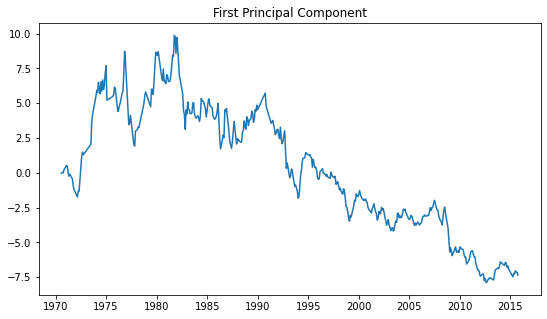

In [12]:
#plt.style.use('ggplot')
ax = plt.figure(figsize=(9,5))
ax = plt.plot(principal_components[0])
ax = plt.title("First Principal Component")

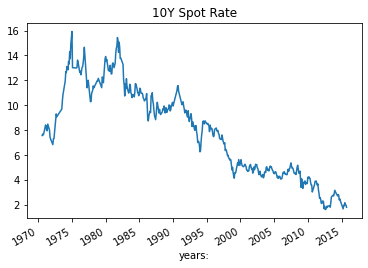

<Figure size 648x360 with 0 Axes>

In [13]:
df_10 = pd.DataFrame(df.iloc[:, [19]].values, columns=['10Y-Rate'], index = df.index)
ax = df_10.plot(y='10Y-Rate', legend=False)
ax = plt.title("10Y Spot Rate")
ax = plt.figure(figsize=(9,5))

The second principal component, Z2, is 
the one with the second highest eigenvalue of 0.309852 
corresponding to an explained variance proportion of 1.55%.
The up and down movements of this second principal hidden or latent Z feature 
correspond closely to the up and down movements of the UK inflation rate that
we plot below, and with which it is highly correlated (pearson corr =0.95856134).
The UK inflation rate is approximated as the difference 
between the rates of two different maturity spot rates: 10Y-2Y.

In [14]:
# Calaculate 10Y-2Y slope

df_s = pd.DataFrame(data = df)
df_s = df_s[[2,10]]
df_s["slope"] = df_s[10] - df_s[2]
df_s.head()

,2,10,slope
years:,,,
1970-07-31,7.106046,7.559915,0.453869
1970-08-31,7.063535,7.678102,0.614567
1970-09-30,7.018305,7.614256,0.595951
1970-10-31,7.364677,7.764320,0.399643
1971-01-31,7.035600,8.408105,1.372505


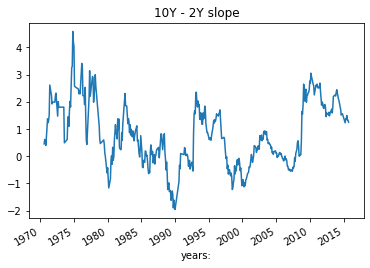

<Figure size 648x360 with 0 Axes>

In [15]:
ax = df_s.plot(y="slope", legend=False)
ax = plt.title("10Y - 2Y slope")
ax = plt.figure(figsize=(9,5))

In [16]:
np.corrcoef(principal_components[1], df_s["slope"])

array([[1.        , 0.95856134],
       [0.95856134, 1.        ]])

We call this a "two factor" model of all spot rates,
with the 10-year spot rate and the
UK inflation rate as the underlying driving forces.

These results make sense. Remember that as per pca_yield_curve_INTRO.ipynb: 
The first eigenvector and principal component has been identified as the TSIR sensitivity to changes in yield curve level,
the second eigenvector and principal component has been identified as the TSIR sensitivity to changes in yield curve slope,
the third eigenvector and principal component has been identified as the TSIR sensitivity to changes in yield curve curvature.
The results of this notebook confirm this finding because:
The changes in yield curve level are closely tracked by the changes in the level of the 10 Year Spot Rate.
The changes in the yield curve slope are closely tracked by the changes in the Inflation Rate.

# 4. PCA projections: eigenvalue calculation by hand

It is possible to calculate the eigenvectors (and the associated explained variance)
by working backwards from the PCA projected Z features.
The eigenvectors appear as the diagonal elements of the Z features covariance matrix.
So:
1.966084e+01 is the first eigenvalue 19.66084,
3.098525e-01 is the second eigenvalue 0.309852,
etc.
To calculate the sum of the diagonal, use np.trace()

In [17]:
principal_components.cov()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.966084e+01,2.498612e-16,1.717796e-16,-1.046294e-15,1.044342e-16,4.277409e-16,1.183425e-16,-7.589777e-16,2.418105e-15,-1.733719e-15,2.003713e-15,-1.295930e-15,-2.020337e-15,-5.881923e-15,-8.218586e-15,-1.589392e-15,-4.977196e-16,7.691953e-16,4.679790e-16,3.070280e-16
1,2.498612e-16,3.098525e-01,-2.137484e-16,1.586033e-16,-3.353850e-16,4.594615e-16,3.366736e-16,-2.818563e-16,7.001325e-17,1.018956e-16,-1.178455e-16,-2.934286e-18,2.037971e-16,-1.232300e-16,-1.195801e-16,4.916073e-17,-6.696210e-17,5.181408e-17,-9.356784e-17,5.179994e-17
2,1.717796e-16,-2.137484e-16,2.488985e-02,-2.070688e-16,2.113389e-16,-3.826991e-16,-2.191003e-16,1.202373e-16,-1.733979e-16,1.672152e-16,-3.721655e-17,1.895166e-17,-1.329557e-16,4.588130e-17,-5.717218e-17,-8.438133e-19,-1.307291e-16,-8.632440e-17,1.594577e-16,5.616442e-17
3,-1.046294e-15,1.586033e-16,-2.070688e-16,3.497014e-03,1.732684e-16,8.903897e-17,6.232518e-17,-6.452266e-17,3.459415e-17,-4.586890e-18,-9.137590e-17,6.057840e-17,1.170963e-16,-1.241787e-16,8.995060e-17,-5.032409e-17,7.573284e-17,-4.688664e-17,-4.351038e-18,-3.390142e-17
4,1.044342e-16,-3.353850e-16,2.113389e-16,1.732684e-16,8.056089e-04,-5.366210e-16,-4.082748e-16,2.670273e-16,-2.266199e-16,-1.360257e-16,-5.679150e-17,1.131806e-16,2.775583e-17,7.969615e-17,6.935146e-17,-5.554592e-17,-1.709822e-16,6.634398e-17,2.429072e-17,2.864530e-17
5,4.277409e-16,4.594615e-16,-3.826991e-16,8.903897e-17,-5.366210e-16,1.027509e-04,-3.049577e-16,9.535258e-17,-3.588761e-17,6.586132e-17,-9.795283e-17,-1.145687e-16,-6.355693e-17,-6.066729e-17,-2.207380e-16,1.310573e-16,1.173124e-16,4.391118e-17,5.956892e-17,-9.453049e-17
6,1.183425e-16,3.366736e-16,-2.191003e-16,6.232518e-17,-4.082748e-16,-3.049577e-16,8.599038e-06,-8.906193e-17,-3.498806e-17,-1.333345e-16,-2.676252e-19,-5.821939e-17,-1.243260e-16,6.144033e-18,5.371818e-17,3.864674e-17,4.076136e-17,-9.731208e-17,1.840611e-16,1.242340e-16
7,-7.589777e-16,-2.818563e-16,1.202373e-16,-6.452266e-17,2.670273e-16,9.535258e-17,-8.906193e-17,1.209135e-06,-5.548255e-17,1.106497e-16,3.096662e-17,1.841906e-17,-8.095407e-17,6.157448e-17,-1.234513e-16,7.475404e-17,1.077999e-16,1.767638e-16,-6.329103e-17,-3.601942e-17
8,2.418105e-15,7.001325e-17,-1.733979e-16,3.459415e-17,-2.266199e-16,-3.588761e-17,-3.498806e-17,-5.548255e-17,9.348633e-08,-6.027754e-17,6.530337e-17,3.370311e-17,-6.066558e-17,-4.959230e-17,5.947146e-18,5.507845e-17,1.908155e-16,3.456721e-17,5.929582e-17,-1.289755e-16
9,-1.733719e-15,1.018956e-16,1.672152e-16,-4.586890e-18,-1.360257e-16,6.586132e-17,-1.333345e-16,1.106497e-16,-6.027754e-17,1.487800e-08,6.855153e-17,2.047723e-17,-4.528988e-17,7.185338e-17,-5.359753e-17,2.042047e-18,3.749041e-17,-5.124333e-17,-7.253633e-17,1.713404e-16
